## MNIST Data augmentation by shifting the pixels and adding it to the training data

In [18]:
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
print(type(mnist))

<class 'sklearn.utils._bunch.Bunch'>


(70000, 784) (70000,)


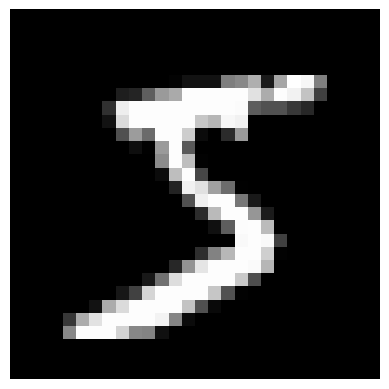

In [19]:
import matplotlib.pyplot as plt
X,y = mnist.data, mnist.target
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def reshape(image):
    img = image.reshape(28,28)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    return img
image = reshape(X[0])

from scipy.ndimage import shift
def shift_image(img, dx, dy):
    img = img.reshape((28, 28))
    shifted_image = shift(img, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])







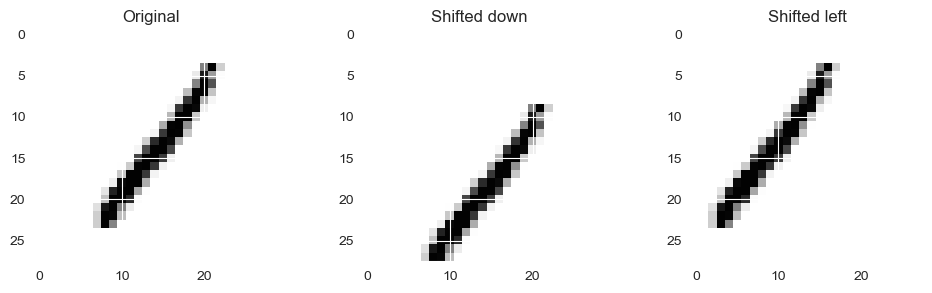

In [20]:
image = X_train[1000]  # some random digit to demo
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title("Original")
plt.imshow(image.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down")
plt.imshow(shifted_image_down.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left")
plt.imshow(shifted_image_left.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.show()

In [21]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((-1, 0), (1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [ ]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]